In [53]:
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

import matplotlib.pyplot as plt

import pysam
import singlecellmultiomics.molecule
import singlecellmultiomics.fragment
import pysamiterators
import pandas as pd

nla_test_bam_path = '../data/mini_nla_test.bam'

In [91]:
reference = pysamiterators.iterators.CachedFasta(pysam.FastaFile('/media/sf_data/references/GATK-Bundle/hg38/Homo_sapiens_assembly38.fasta'))

<IPython.core.display.Javascript object>


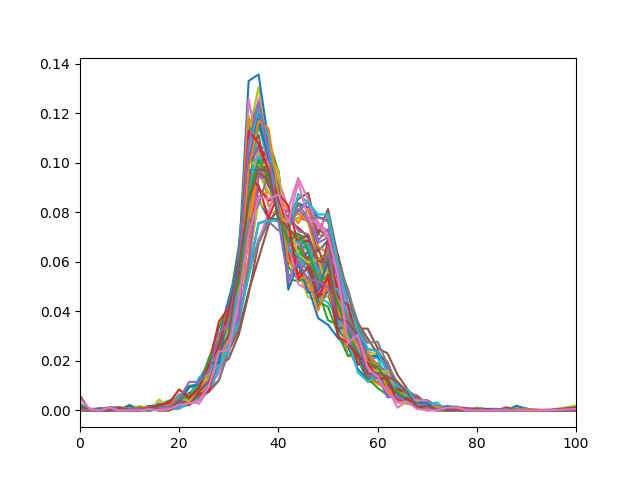

In [ ]:
from singlecellmultiomics.molecule import NlaIIIMolecule, MoleculeIterator
from singlecellmultiomics.fragment import NLAIIIFragment
import collections

fig, ax = plt.subplots()
gc_distribution = collections.defaultdict(collections.Counter) #cell->GC_bin->count
gc_bin_size = 2
with pysam.AlignmentFile('/media/sf_H_DRIVE/data/nla/APKS1-P10-1-1/sorted.bam') as alignments:
    for i,molecule in enumerate(
            MoleculeIterator(alignments,
                             moleculeClass=NlaIIIMolecule,
                             fragmentClass=NLAIIIFragment,
                             molecule_class_args={
                                 'reference':reference,
                                 'min_max_mapping_quality':20
                             },                     
                             fragment_class_args={
                                'umi_hamming_distance':1
                             },
                          )):
        try:
            bf = collections.Counter( molecule.get_fragment_span_sequence() )
            gc = (bf['G']+bf['C'])/sum(bf.values())
        except ValueError: # cannot obtain gc
            continue
        
        gc_bin = int(gc*100/gc_bin_size)*gc_bin_size
        gc_distribution[molecule.sample][gc_bin]+=1
        
        if i>0 and i%10000==0: #update plot every 1k molecules
            ax.clear()

            cf = pd.DataFrame(gc_distribution).sort_index().fillna(0)
            df = cf.T[cf.sum() > np.percentile(cf.sum(),40) ].T
            nf = df/df.sum()
            nf.plot(ax=ax,legend=False)
            fig.canvas.draw()
 

<IPython.core.display.Javascript object>


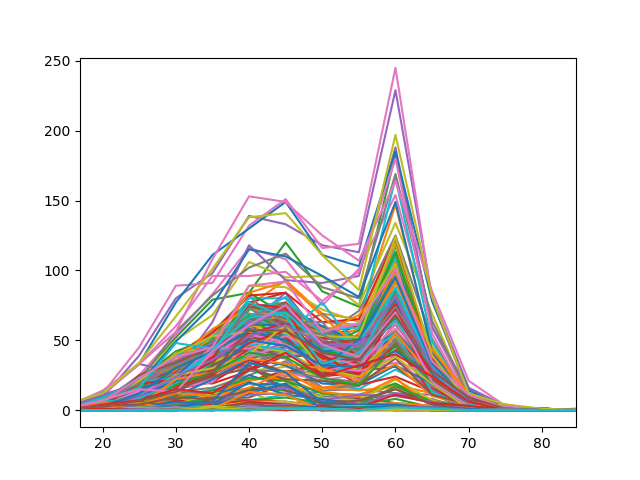

In [97]:
fig, ax = plt.subplots()
df.plot(ax=ax,legend=False)
fig.canvas.draw()

In [83]:
df

,APKS2-P18-1-1_366,APKS2-P18-1-1_177,APKS2-P18-1-1_279,APKS2-P18-1-1_173,APKS2-P18-1-1_301,APKS2-P18-1-1_253,APKS2-P18-1-1_29,APKS2-P18-1-1_353,APKS2-P18-1-1_140,APKS2-P18-1-1_283,...,APKS2-P18-1-1_260,APKS2-P18-1-1_217,APKS2-P18-1-1_19,APKS2-P18-1-1_188,APKS2-P18-1-1_354,APKS2-P18-1-1_218,APKS2-P18-1-1_258,APKS2-P18-1-1_74,APKS2-P18-1-1_380,APKS2-P18-1-1_375
0,0.000000,0.000000,0.000000,0.000000,0.001300,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0
10,0.000000,0.000000,0.000000,0.000000,0.001300,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0
15,0.000000,0.004598,0.001815,0.010076,0.001300,0.003049,0.001650,0.000000,0.001770,0.002740,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0
20,0.020161,0.016092,0.016334,0.012594,0.011704,0.009146,0.009901,0.027211,0.010619,0.005479,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0
25,0.040323,0.029885,0.039927,0.052897,0.045514,0.051829,0.033003,0.040816,0.033628,0.038356,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.333333,0.0
30,0.084677,0.059770,0.081670,0.085642,0.091027,0.088415,0.080858,0.057823,0.084956,0.104110,...,0.0,0.25,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0
35,0.125000,0.105747,0.130672,0.133501,0.102731,0.131098,0.125413,0.125850,0.107965,0.120548,...,0.5,0.00,0.0,0.50,0.0,0.0,0.0,0.000000,0.000000,0.0
40,0.173387,0.172414,0.139746,0.158690,0.176853,0.134146,0.166667,0.183673,0.152212,0.153425,...,0.0,0.00,0.5,0.00,0.5,0.0,0.5,0.000000,0.333333,0.5
45,0.165323,0.179310,0.188748,0.158690,0.162549,0.176829,0.158416,0.156463,0.180531,0.158904,...,0.5,0.00,0.0,0.00,0.0,0.0,0.5,0.000000,0.000000,0.0


In [72]:
df = pd.DataFrame(gc_distribution).sort_index().fillna(0)
df = df[ df.sum() > np.percentile(df.sum(),10) ]

/home/buysdb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80
APKS2-P18-1-1_366,0.0,0.0,0.0,3.0,7.0,15.0,16.0,26.0,30.0,8.0,4.0,0.0,1.0,0.0,0.0,0.0
APKS2-P18-1-1_177,0.0,0.0,2.0,4.0,9.0,13.0,22.0,30.0,28.0,14.0,4.0,3.0,2.0,0.0,0.0,0.0
APKS2-P18-1-1_279,0.0,0.0,1.0,7.0,16.0,29.0,40.0,41.0,43.0,16.0,5.0,2.0,1.0,1.0,0.0,0.0
APKS2-P18-1-1_173,0.0,0.0,4.0,3.0,18.0,19.0,30.0,36.0,32.0,17.0,6.0,7.0,5.0,0.0,0.0,0.0
APKS2-P18-1-1_301,0.0,0.0,1.0,7.0,28.0,48.0,40.0,66.0,59.0,16.0,19.0,10.0,4.0,1.0,0.0,0.0
APKS2-P18-1-1_253,0.0,0.0,1.0,3.0,11.0,12.0,20.0,22.0,25.0,14.0,3.0,3.0,0.0,0.0,0.0,0.0
APKS2-P18-1-1_29,0.0,0.0,1.0,4.0,16.0,30.0,37.0,54.0,41.0,19.0,7.0,4.0,2.0,0.0,0.0,0.0
APKS2-P18-1-1_353,0.0,0.0,0.0,6.0,9.0,12.0,14.0,28.0,30.0,15.0,6.0,1.0,2.0,0.0,0.0,0.0
APKS2-P18-1-1_140,0.0,0.0,1.0,5.0,10.0,25.0,31.0,44.0,48.0,21.0,8.0,2.0,1.0,0.0,0.0,0.0
APKS2-P18-1-1_283,0.0,0.0,1.0,2.0,11.0,27.0,21.0,29.0,31.0,12.0,9.0,1.0,1.0,0.0,0.0,0.0


In [21]:
from singlecellmultiomics.molecule import TAPSNlaIIIMolecule, MoleculeIterator
from singlecellmultiomics.fragment import NLAIIIFragment


fig, ax = plt.subplots()
methylation_distribution = collections.Counter()

with pysam.AlignmentFile('/media/sf_H_DRIVE/data/TAPS/sorted.bam') as alignments:
    for i,molecule in enumerate(
            MoleculeIterator(alignments,
                            
                             moleculeClass=NlaIIIMolecule,
                             fragmentClass=NLAIIIFragment,
                             fragment_class_args={
                                'umi_hamming_distance':1
                             },
                          )):
        try:
            gc = molecule.get_consensus_gc_ratio()
        except Exception as e:
            continue
            
        gc_bin = int(gc*100/gc_bin_size)*gc_bin_size
        gc_distribution[gc_bin]+=1
        
        if i>0 and i%1000==0: #update plot every 1k molecules
            ax.clear()
            pd.DataFrame({'GC':gc_distribution}).plot.bar(ax=ax)
            fig.canvas.draw()

,GC
0.05,2
0.10,2
0.15,96
0.20,468
0.25,1272
0.30,2405
0.35,2745
0.40,4227
0.45,4147
0.50,1894


In [ ]:
pd.DataFrame(RT_vs_gc)

In [ ]:
# Find a molecule with 4 fragments
molecules_seen = [] # store all molecules, used in next examples
with pysam.AlignmentFile(nla_test_bam_path) as alignments:
    for i,molecule in enumerate(
            singlecellmultiomics.molecule.MoleculeIterator(alignments,
                                                            fragment_class_args={
                                                                'umi_hamming_distance':1
                                                            },
                                                           moleculeClass=singlecellmultiomics.molecule.NlaIIIMolecule,
                                                           fragmentClass=singlecellmultiomics.fragment.NLAIIIFragment

                                                          )):
        molecules_seen.append(molecule)
        if len(molecule)==4 and i>0:
            break
molecule

In [ ]:
# Obtain associated unique molecular identifiers
molecule.umi_counter

In [ ]:
# Iterate over all fragments in the molecule, obtain their R1 and print the read name:
for fragment in molecule:
    print(fragment.get_R1().query_name )

In [ ]:
# Iterate over all reverse transcription reactions:
for (reverse_primer_start, reverse_primer_sequence), associated_fragments in molecule.get_rt_reactions().items():
    print(reverse_primer_start,reverse_primer_sequence,associated_fragments)

## Equivalence testing

### Comparing fragments

In [ ]:
# compare two fragments: (check if they should belong to the same molecule)
fragment_A = molecule[0]
fragment_B = molecule[1]
fragment_A == fragment_B

In [ ]:
# Obtain a fragment not belonging to the molecule 
fragment_C = molecules_seen[0][0]
fragment_C

In [ ]:
fragment_C == fragment_A

### Comparing fragment to molecule

In [ ]:
# Fragment A belongs to molecule, this comparison results in True
fragment_A == molecule

In [ ]:
# Fragment C does not belong to molecule
fragment_C == molecule 

# Consensus sequence

In [ ]:
# Obtain the aligned base frequencies in a pandas dataframe
pd.DataFrame( molecule.get_base_observation_dict() )

In [ ]:
# Obtain the molecule consensus sequence as pandas df:
pd.DataFrame({'base':molecule.get_consensus()}).T

# Visualisation

In [ ]:
# Display the molecule here in the notebook:
from IPython.core.display import display, HTML
display(HTML( molecule.get_html() ))

In [ ]:
# Display a single read:
fragment = molecule[0]
display(HTML(fragment.get_html(span_start=molecule.spanStart, span_end=molecule.spanEnd,show_read1=1,show_read2=0) ))

In [ ]:
str(fragment[0])

In [ ]:
tensor = molecule.get_alignment_tensor(
    max_reads=8,
    centroid=molecule.spanStart,
    window_radius=10)
plt.imshow(tensor)